# Code your own neuron and neural net
The parts of code that look like
```python
pass  # ⬅️✏️
```
need to be filled in before moving to the next cell.

Check out the slides and / or corresponding video lecture for more instructions.

In [1]:
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [2]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    return [ a_ * b_ for a_, b_ in zip(a,b)]

---

In [3]:
# Test mul() function
mul(my_x, my_w)

[0, 10, 5]

In [4]:
# Define a scalar: bias b
my_b = -5

In [7]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    # w^T*x + b
    return sum(mul(x, weights)) + bias

---

In [8]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b)

10

In [9]:
# Import exp() function (safe on lists)
from numpy import exp

In [12]:
# Logistic sigmoid
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    return 1/(1 + exp(-z))

---

In [13]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.0066928509242848554
0.5
0.9933071490757153


In [14]:
# Import some plotting stuff to graph sigmoid()
from numpy import linspace
from matplotlib.pyplot import plot, axhline, axvline, grid, style
style.use('dark_background')

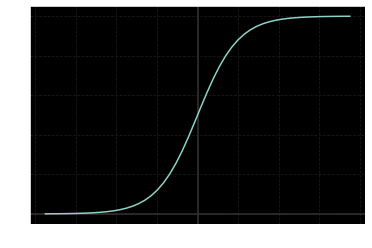

In [15]:
# Get a pair of axis and grid lines centred in (0, 0)
axhline(c='.2'); axvline(color='.2')
grid(c='.1', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z));

In [16]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    return sigmoid(linear_neuron(x, weights, bias))

---

In [17]:
# Test neuron() function
neuron(my_x, my_w, my_b)

0.9999546021312976

In [18]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    weights = [16, 16]
    bias = -8
    return neuron(x, weights, bias)

---

In [19]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [20]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Checking OR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 1.000


In [29]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    weights = [12,12]
    bias = -16
    return neuron(x, weights, bias)

---

In [30]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Checking AND neuron output
[0, 0] 0.000
[0, 1] 0.018
[1, 0] 0.018
[1, 1] 1.000


In [31]:
# Package NOT neuron weight and bias
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    weights = [-16]
    bias = 8
    return neuron(x, weights, bias)

---

In [32]:
print('Checking NOT neuron output')
for my_x in [[0], [1]]:
    print(my_x, f'{not_neuron(my_x):.3f}')

Checking NOT neuron output
[0] 1.000
[1] 0.000


![X-OR](res/x-or_circuit.png)

In [39]:
# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    x1, x2 = x
    x1_, x2_ = not_neuron([x1]), not_neuron([x2])
    return or_neuron([and_neuron([x1_, x2]), and_neuron([x1, x2_])])

---

In [40]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 0.001
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 0.001


![Half-adder](res/half-adder_circuit.png)

In [52]:
# Combine a XOR and an AND into a half-adder
def half_adder(x):
    s = xor_neuron(x)
    c = and_neuron(x)
    return s, c

---

![Adder](res/adder_circuit.png)

In [72]:
# Combine two half-adders and an OR into a (full) adder
def full_adder(x, c_in):
    s_half, c_half = half_adder(x)
    s_out, c_int = half_adder([s_half, c_in])
    c_out = or_neuron([c_half, c_int])
    return round(s_out), round(c_out)

In [80]:
print('Checking full adder output')
for my_x in my_x_collection:
    s, c = full_adder(my_x, 1)
    print(f'{my_x} c: {1}', f'sum: {s} carry: {c}')

Checking full adder output
[0, 0] c: 1 sum: 1 carry: 0
[0, 1] c: 1 sum: 0 carry: 1
[1, 0] c: 1 sum: 0 carry: 1
[1, 1] c: 1 sum: 1 carry: 1


In [82]:
def turn_to_binary_array(num: int, precision: int):
    rep = bin(num).split('b')[1]
    num_bits = len(rep)
    if num_bits <= precision:
        rep = '0' * (precision - len(rep)) + rep
    else:
        rep = rep[-precision:]   
    return [int(digit) for digit in rep]

In [89]:
turn_to_binary_array(3, 8)

[0, 0, 0, 0, 0, 0, 1, 1]

In [90]:
from collections import deque
def nbit_adder(a: int, b: int, c: int, n: int):
    assert a >= 0 and b >= 0
    a_bin = turn_to_binary_array(a, n)
    b_bin = turn_to_binary_array(b, n)
    out = deque()
    for a_, b_ in zip(a_bin[::-1], b_bin[::-1]):
        s, c = full_adder([a_, b_], c)
        out.appendleft(str(int(s)))
    print(out)
    return int(''.join(out), 2), c

In [99]:

nbit_adder(200, 56, 0, 16)

deque(['0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0'])


(256, 0)

---